In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix,
    classification_report, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("credit_scoring_dataset.csv")
df

,income,debt,loan_amount,num_credit_cards,credit_util_ratio,num_loans,delayed_payments,credit_history_length,credit_inquiries,emi_per_month,credit_score
0,0.077957,-0.270268,0.305725,0.641947,0.310986,-1.753479,0.490101,-0.984763,0.312040,-1.207581,Standard
1,1.882358,-1.312163,-0.852371,0.382433,0.761572,0.659850,-2.107688,0.848211,-1.643698,0.822848,Standard
2,1.989394,-1.132149,-1.825930,0.976431,0.522747,1.591064,-3.469974,0.293855,-3.179645,2.566608,Standard
3,0.334309,-0.922189,-0.367614,-1.001315,-1.629881,1.721244,1.435247,0.495273,-0.148973,-0.953017,Standard
4,-1.094173,0.008858,-0.262848,0.975823,-3.705087,0.759196,-0.859543,-0.106847,3.316572,0.926780,Good
...,...,...,...,...,...,...,...,...,...,...,...
995,-3.600356,1.498012,1.260826,0.101723,-0.817434,0.884281,5.195328,0.453865,2.027731,-2.061112,Good
996,2.992095,0.898512,-0.805770,-0.618160,0.369749,1.607754,-0.600762,0.338962,-3.180461,-0.072288,Standard
997,3.321047,-0.290454,-1.988631,1.462255,1.033507,0.299773,-5.091915,1.139213,-2.400012,1.807467,Standard
998,0.477334,-2.707544,-0.840817,0.864248,2.619131,-1.737087,-4.072990,2.552042,0.809051,0.707662,Standard


In [3]:
le = LabelEncoder()
df['credit_score_encoded'] = le.fit_transform(df['credit_score'])  # Bad=0, Good=1, Standard=2

In [4]:
X = df.drop(['credit_score', 'credit_score_encoded'], axis=1)
y = df['credit_score_encoded']

In [5]:
X

,income,debt,loan_amount,num_credit_cards,credit_util_ratio,num_loans,delayed_payments,credit_history_length,credit_inquiries,emi_per_month
0,0.077957,-0.270268,0.305725,0.641947,0.310986,-1.753479,0.490101,-0.984763,0.312040,-1.207581
1,1.882358,-1.312163,-0.852371,0.382433,0.761572,0.659850,-2.107688,0.848211,-1.643698,0.822848
2,1.989394,-1.132149,-1.825930,0.976431,0.522747,1.591064,-3.469974,0.293855,-3.179645,2.566608
3,0.334309,-0.922189,-0.367614,-1.001315,-1.629881,1.721244,1.435247,0.495273,-0.148973,-0.953017
4,-1.094173,0.008858,-0.262848,0.975823,-3.705087,0.759196,-0.859543,-0.106847,3.316572,0.926780
...,...,...,...,...,...,...,...,...,...,...
995,-3.600356,1.498012,1.260826,0.101723,-0.817434,0.884281,5.195328,0.453865,2.027731,-2.061112
996,2.992095,0.898512,-0.805770,-0.618160,0.369749,1.607754,-0.600762,0.338962,-3.180461,-0.072288
997,3.321047,-0.290454,-1.988631,1.462255,1.033507,0.299773,-5.091915,1.139213,-2.400012,1.807467
998,0.477334,-2.707544,-0.840817,0.864248,2.619131,-1.737087,-4.072990,2.552042,0.809051,0.707662


In [6]:
y

0      2
1      2
2      2
3      2
4      1
      ..
995    1
996    2
997    2
998    2
999    2
Name: credit_score_encoded, Length: 1000, dtype: int32

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

In [8]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    print(f"\n--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
    print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
    print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
evaluate_model("Logistic Regression", lr, X_test, y_test)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
evaluate_model("Decision Tree", dt, X_test, y_test)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
evaluate_model("Random Forest", rf, X_test, y_test)


--- Logistic Regression ---
Accuracy: 0.58
Precision (macro): 0.5830048824604178
Recall (macro): 0.58
F1 Score (macro): 0.5797496654143827
Confusion Matrix:
 [[62 22 16]
 [23 59 18]
 [29 18 53]]

Classification Report:
               precision    recall  f1-score   support

         Bad       0.54      0.62      0.58       100
        Good       0.60      0.59      0.59       100
    Standard       0.61      0.53      0.57       100

    accuracy                           0.58       300
   macro avg       0.58      0.58      0.58       300
weighted avg       0.58      0.58      0.58       300


--- Decision Tree ---
Accuracy: 0.67
Precision (macro): 0.6710602759622368
Recall (macro): 0.6699999999999999
F1 Score (macro): 0.6695484426985208
Confusion Matrix:
 [[73 18  9]
 [17 65 18]
 [18 19 63]]

Classification Report:
               precision    recall  f1-score   support

         Bad       0.68      0.73      0.70       100
        Good       0.64      0.65      0.64       100
    St

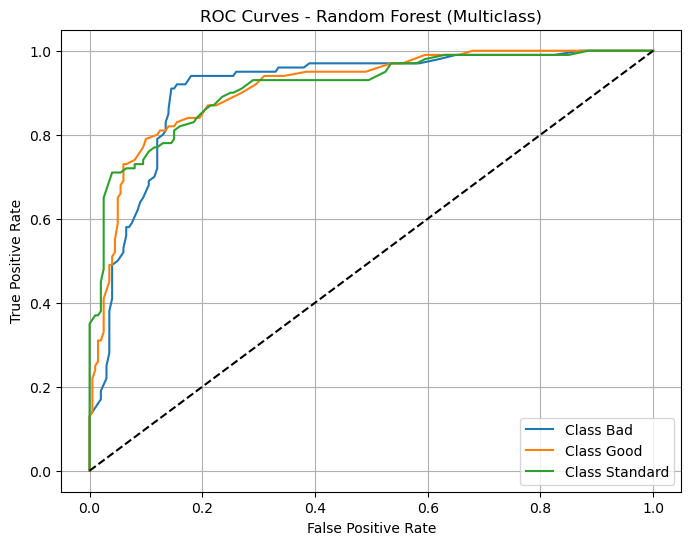

In [9]:
y_prob_rf = rf.predict_proba(X_test)
fpr = {}
tpr = {}
for i in range(len(le.classes_)):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_prob_rf[:, i])


plt.figure(figsize=(8, 6))
for i in range(len(le.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"Class {le.classes_[i]}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves - Random Forest (Multiclass)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()
